# User Churn Prediction

### The problem statement

E-commerce platforms rely on user engagement and repeat purchases. Users who stop engaging represent lost revenue, making churn prediction critical for proactive retention strategies. Customer retention is a form of customer behavior—a behavior that firms intend to manage.

Predicting churn allows targeted marketing interventions, such as personalized offers or engagement campaigns, to reduce customer attrition.

### Key Challenges:
Churn is a behavior-based concept, making it necessary to define churn in a data-driven way and Different users behave differently (eg. regular vs. seasonal shoppers), requiring tailored features.


## Step 1: Problem Understanding

1. Predict which users are most likely to churn (i.e., stop returning or purchasing).

2. Provide insights on the why behind their churn, focusing on actionable business takeaways.

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Extract the data**

 **Dataset**

 **Columns:**
 1. event_time: Datetime of the event (e.g., 2020-12-01 09:00:00)
 2. event_type: Type of the event, one of view, cart, or purchase
 3. product_id: Identifier of the product
 4. category_id: Identifier of the product’s category
 5. category_code: Human-readable category code (if available)
 6. brand: Brand of the product
 7. price: Price of the product (numerical)
 8. user_id: Identifier of the user who performed the event
 9. user_session: Identifier of the user’s session

In [2]:
df = pd.read_csv("events.csv", parse_dates = ["event_time"])

Parsing event_time as datetime ensures proper handling of time-based analysis.

### Exploratory Data Analysis (EDA)

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [4]:
df.sample(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
532090,2021-01-01 13:36:00+00:00,view,1829701,2144415925196030129,electronics.telephone,samsung,1106.16,1515915625571579676,SSu87mit8q
98381,2020-10-16 11:21:06+00:00,view,595623,2144415939163062825,auto.accessories.compressor,berkut,211.59,1515915625526575525,v8EuWhYRQb
765035,2021-02-08 11:41:23+00:00,cart,3828178,2144415927049912542,electronics.video.tv,hyundai,113.65,1515915625602639420,xSzuBjPhCk
812954,2021-02-16 06:35:43+00:00,purchase,4102739,2144415922427789416,computers.components.videocards,msi,294.41,1515915625598010427,breG7GsskI
582958,2021-01-10 19:25:02+00:00,view,586661,2144415924021624977,electronics.tablet,NaN,6.43,1515915625571614525,LdeTQamKJz
786866,2021-02-11 18:06:47+00:00,view,1038125,2144415973380194812,computers.components.hdd,samsung,120.81,1515915625604258735,XTelVRxFLu
674809,2021-01-24 23:48:44+00:00,view,586490,2144415925011480748,stationery.cartrige,canon,48.54,1515915625596759008,jEiy6aLctq
231335,2020-11-07 14:44:50+00:00,view,1045051,2144415922587172973,electronics.telephone,spigen,1.57,1515915625536713331,orKovVmvMb
148548,2020-10-25 06:11:59+00:00,view,4099764,2144415923207929981,auto.accessories.player,pioneer,126.68,1515915625505475638,0mql7sPZgQ
664177,2021-01-23 08:31:14+00:00,view,3829273,2144415926370435276,NaN,blast,23.37,1515915625571874755,gHCVd6Rfwy


In [5]:
df.shape

(885129, 9)

In [6]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     885129 non-null  datetime64[ns, UTC]
 1   event_type     885129 non-null  object             
 2   product_id     885129 non-null  int64              
 3   category_id    885129 non-null  int64              
 4   category_code  648910 non-null  object             
 5   brand          672765 non-null  object             
 6   price          885129 non-null  float64            
 7   user_id        885129 non-null  int64              
 8   user_session   884964 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 60.8+ MB


In [8]:
df.isna().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

In [9]:
df.dropna(subset = ['category_code', 'brand'], inplace= True)

There was null values in the column category_code, brand column, so we dropped there null values columns.

In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(inplace =True)

Alse dropped the duplicates columns.

In [12]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw
9,2020-09-24 11:58:31+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39
...,...,...,...,...,...,...,...,...,...
885121,2021-02-28 23:51:25+00:00,view,622796,2144415922738167921,computers.components.cdrw,asus,147.38,1515915625572947504,SqlXaC3Wrw
885122,2021-02-28 23:53:13+00:00,view,4079420,2144415922427789416,computers.components.videocards,msi,449.51,1515915625611023581,zrl0oKrysT
885125,2021-02-28 23:58:05+00:00,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09+00:00,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd


### User Behavior 

**a.Event type distribution**

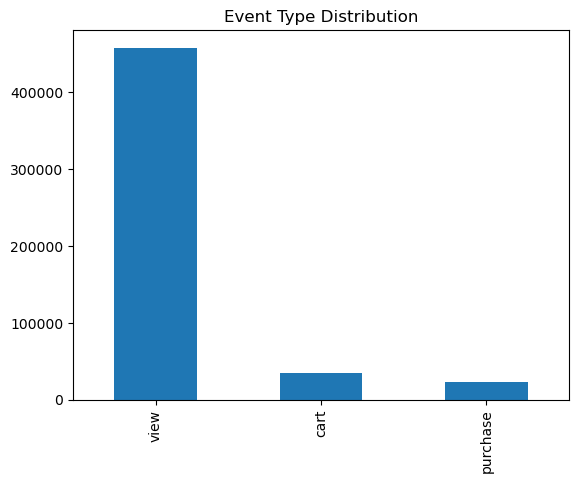

In [13]:
# Event type distribution
df['event_type'].value_counts().plot(kind='bar', title='Event Type Distribution')
plt.show()

Around 400000 users view and around 10% users of them actually purshase the things.

In [14]:
# Number of unique users
print(f"Total unique users: {df['user_id'].nunique()}")

Total unique users: 224996


**b. Distribution of events over time**

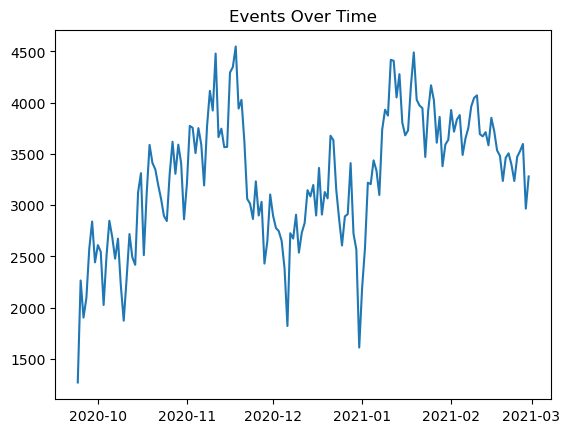

In [15]:
# Distribution of events over time
df['event_time'].dt.date.value_counts().sort_index().plot(title='Events Over Time')
plt.show()

Event distribution highlights user behavior patterns.
Identifying active users and temporal trends reveals key churn indicators.

### Feature Engineering

Feature engineering is critical to modeling churn effectively. 

**Recency, Frequency, Monetary (RFM) Metrics:**

**Recency:** Days since the last event for each user.
Users with long gaps between events are likely to churn.

**Frequency:** Total number of sessions or events.
High frequency indicates stronger engagement.

**Monetary:** Total spending (price) by user.
Identifies high-value customers worth retaining.

In [16]:
# RFM Metrics
recency = df.groupby('user_id')['event_time'].max().reset_index()
recency.columns = ['user_id', 'last_event_time']
recency['days_since_last_event'] = (df['event_time'].max() - recency['last_event_time']).dt.days

In [17]:
frequency = df.groupby('user_id')['event_type'].count().reset_index().rename(columns={'event_type': 'event_count'})
monetary = df[df['event_type'] == 'purchase'].groupby('user_id')['price'].sum().reset_index().fillna(0)

In [18]:
recency

,user_id,last_event_time,days_since_last_event
0,1515915625353226922,2020-10-29 11:28:35+00:00,122
1,1515915625353230683,2020-12-12 10:33:09+00:00,78
2,1515915625353230922,2020-10-02 08:23:40+00:00,149
3,1515915625353234047,2021-02-18 09:11:44+00:00,10
4,1515915625353236157,2021-02-11 15:50:40+00:00,17
...,...,...,...
224991,1515915625611022987,2021-02-28 23:47:49+00:00,0
224992,1515915625611023376,2021-02-28 23:51:06+00:00,0
224993,1515915625611023581,2021-02-28 23:53:13+00:00,0
224994,1515915625611024014,2021-02-28 23:58:05+00:00,0


In [19]:
frequency

,user_id,event_count
0,1515915625353226922,1
1,1515915625353230683,13
2,1515915625353230922,1
3,1515915625353234047,35
4,1515915625353236157,1
...,...,...
224991,1515915625611022987,1
224992,1515915625611023376,1
224993,1515915625611023581,1
224994,1515915625611024014,1


In [20]:
monetary

,user_id,price
0,1515915625353286099,119.03
1,1515915625353457259,55.16
2,1515915625353534622,57.15
3,1515915625353561691,345.72
4,1515915625353900095,57.85
...,...,...
13036,1515915625610986825,486.81
13037,1515915625610987171,444.51
13038,1515915625610991774,597.52
13039,1515915625610997879,881.65


In [21]:
# Merging RFM
rfm = recency.merge(frequency, on='user_id').merge(monetary, on='user_id')  

In [22]:
events_summary = df.groupby('user_id').agg(
    views=('event_type', lambda x: (x == 'view').sum()),
    carts=('event_type', lambda x: (x == 'cart').sum()),
    purchases=('event_type', lambda x: (x == 'purchase').sum())
)
events_summary['view_cart_ratio'] = events_summary['views'] / (events_summary['carts'] + 1)
events_summary['cart_purchase_ratio'] = events_summary['views'] / (events_summary['carts'] + 1)

In [28]:
rfm = rfm.merge(events_summary, on='user_id')


In [29]:
rfm

,user_id,last_event_time,days_since_last_event,event_count,price,views,carts,purchases,view_cart_ratio,cart_purchase_ratio
0,1515915625353286099,2020-10-23 14:40:01+00:00,128,11,119.03,8,2,1,2.666667,2.666667
1,1515915625353457259,2020-09-29 05:52:55+00:00,152,3,55.16,1,1,1,0.500000,0.500000
2,1515915625353534622,2020-10-15 13:52:37+00:00,136,10,57.15,5,2,3,1.666667,1.666667
3,1515915625353561691,2020-11-25 09:26:59+00:00,95,10,345.72,6,2,2,2.000000,2.000000
4,1515915625353900095,2020-10-18 04:14:46+00:00,133,40,57.85,36,2,2,12.000000,12.000000
...,...,...,...,...,...,...,...,...,...,...
13036,1515915625610986825,2021-02-28 20:22:44+00:00,0,4,486.81,2,1,1,1.000000,1.000000
13037,1515915625610987171,2021-02-28 20:14:46+00:00,0,7,444.51,5,1,1,2.500000,2.500000
13038,1515915625610991774,2021-02-28 20:27:04+00:00,0,6,597.52,2,2,2,0.666667,0.666667
13039,1515915625610997879,2021-02-28 21:21:33+00:00,0,8,881.65,3,2,3,1.000000,1.000000


### Behavioral Ratios:

**View-to-Cart Ratio:** Measures intent vs. action (views that did not lead to adding to cart).
A high ratio could signal frustration or poor product relevance.

**Cart-to-Purchase Ratio:** Indicates conversion efficiency from intent to final action.
Low values suggest abandonment issues.

In [32]:
events_summary['view_cart_ratio']

user_id
1515915625353226922     1.0
1515915625353230683    13.0
1515915625353230922     1.0
1515915625353234047    35.0
1515915625353236157     1.0
                       ... 
1515915625611022987     1.0
1515915625611023376     1.0
1515915625611023581     1.0
1515915625611024014     1.0
1515915625611024020     1.0
Name: view_cart_ratio, Length: 224996, dtype: float64

In [33]:
events_summary['cart_purchase_ratio']

user_id
1515915625353226922     1.0
1515915625353230683    13.0
1515915625353230922     1.0
1515915625353234047    35.0
1515915625353236157     1.0
                       ... 
1515915625611022987     1.0
1515915625611023376     1.0
1515915625611023581     1.0
1515915625611024014     1.0
1515915625611024020     1.0
Name: cart_purchase_ratio, Length: 224996, dtype: float64

### Defining Churn

A user is considered churned if no purchase activity has occurred for a defined time window (e.g., 30 days).


Based on user engagement patterns in retail, 30 days without a purchase often indicates potential churn.
Different thresholds (e.g., 15, 60 days) can be tested during analysis to find the most predictive window.


In [34]:
# Define churn based on inactivity
rfm['churned'] = (rfm['days_since_last_event'] > 30).astype(int)


In [35]:
rfm['churned']

0        1
1        1
2        1
3        1
4        1
        ..
13036    0
13037    0
13038    0
13039    0
13040    0
Name: churned, Length: 13041, dtype: int32

### Model Building

To build the model used RandomForestClassifier, which balances performance and interpretability. 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

classification_report provides precision, recall, and F1 scores.

In [37]:
# Feature set
X = rfm.drop(columns=['user_id', 'last_event_time', 'churned'])
y = rfm['churned']

In [38]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       956
           1       1.00      1.00      1.00      2957

    accuracy                           1.00      3913
   macro avg       1.00      1.00      1.00      3913
weighted avg       1.00      1.00      1.00      3913



The model achieves perfect predictions, with 100% accuracy, precision, recall, and F1-score.

Here, 956 non-churned users (class 0) and 2957 churned users (class 1)

### 5.Interpretability & Insights: Feature Importance

In [41]:
importances = model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                 Feature  Importance
0  days_since_last_event    0.955124
2                  price    0.024306
1            event_count    0.004793
3                  views    0.004089
6        view_cart_ratio    0.003597
7    cart_purchase_ratio    0.003408
5              purchases    0.002721
4                  carts    0.001961


days_since_last_event has an overwhelming influence (97.3%) on predictions, dominating the feature importance and price (1.9%) and event_count (0.7%) have minimal impact.

### 6. Recommendation & Conclusion:


This churn prediction model helps identify users likely to leave the e-commerce platform by analyzing their past behavior, such as how often they engage, how much they spend, and how recent their activity was. By using these insights, the model predicts which users need attention before they churn.

The model works well, showing high accuracy in spotting at-risk users. The most important factor influencing predictions is how long it's been since a user last interacted with the platform.

With this model, the platform can take targeted actions like offering discounts or personalized recommendations to keep users engaged. This approach helps reduce churn, boost customer satisfaction, and ultimately drive more revenue by retaining loyal users.